## Objective
- Create a linear predictor model and determine the best features for predicting yearly amount spend

In [1]:
# import modules
# Data Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#import data

df = pd.read_csv('ecommerce_data.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.shape

(500, 8)

In [5]:
df.size

4000

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Email,500,500,mstephenson@fernandez.com,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,500,500,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avatar,500,138,SlateBlue,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg. Session Length,500.0,NaN,NaN,NaN,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,NaN,NaN,NaN,12.052488,0.994216,8.508152,11.388153,11.983231,12.75385,15.126994
Time on Website,500.0,NaN,NaN,NaN,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,NaN,NaN,NaN,3.533462,0.999278,0.269901,2.93045,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,NaN,NaN,NaN,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [7]:
#CREATE DATAFRAME FOR ONLY NUMERICAL VARIABLES
num_vars = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
df = df[num_vars]

#check few records of the dataset
df.head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


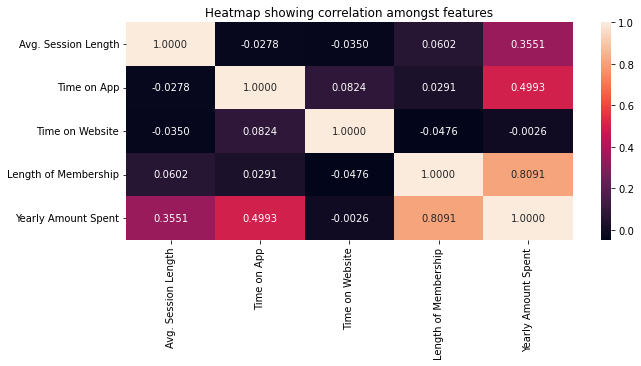

In [8]:
#Visualize Correlation amongst features
plt.figure(figsize=(10,4))
sns.heatmap(data=df.corr(), annot=True, fmt='.4f')
plt.title('Heatmap showing correlation amongst features')
plt.show()


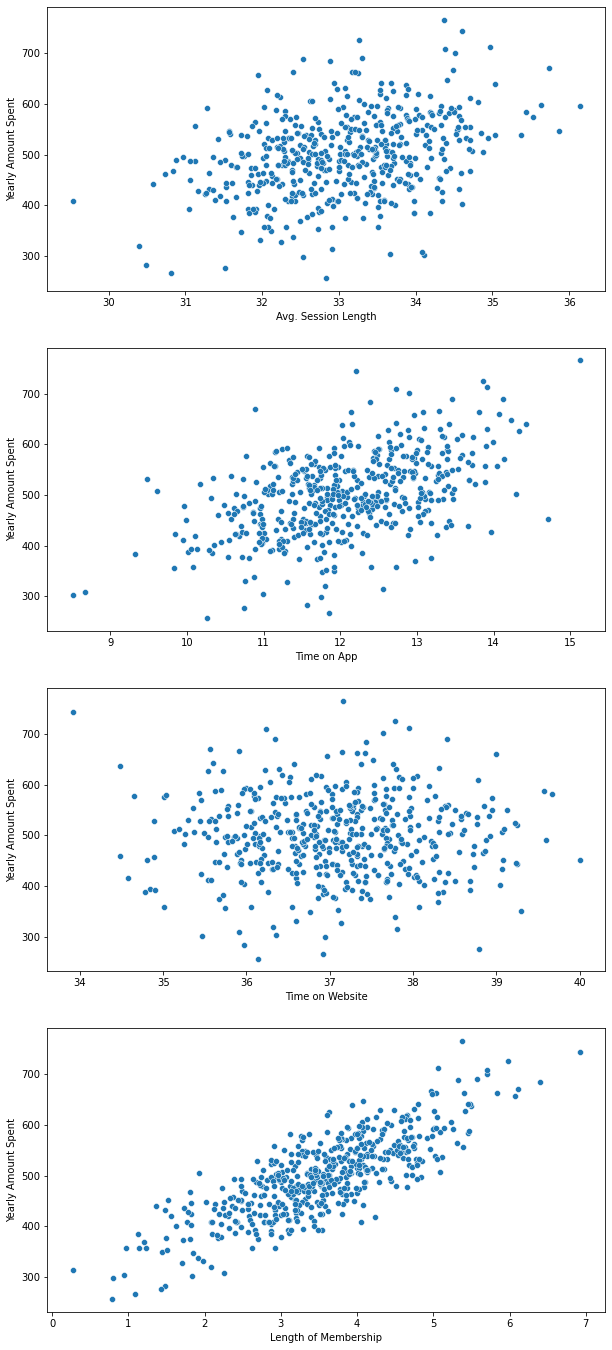

In [9]:
# Graph the relationship between target variable(Yearly Amount Spent) and all the other numerical variables

target = num_vars.pop()
fig, ax = plt.subplots( nrows=len(num_vars), figsize = [10,24])

for num in range(len(num_vars)):
    indi_var = num_vars[num]
    sns.scatterplot(x=df[indi_var], y=df[target], ax=ax[num])
    

We can see a linear relationship between some of the independent features and the target variable. Let's scale our data and see if it has any effect on the realationship 

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

#Function to rescale a pandas series
def rescale_variable(ind_feature):
    
    rescaled_feature = scaler.fit_transform(ind_feature)
    
    return rescaled_feature

In [12]:
Time_on_App = rescale_variable(df[['Time on App']])
Time_on_Website = rescale_variable(df[['Time on Website']])
Yearly_Amt_Spent = rescale_variable(df[['Yearly Amount Spent']])
Avg_Session_Len = rescale_variable(df[['Avg. Session Length']])
Length_of_Membership = rescale_variable(df[['Length of Membership']])


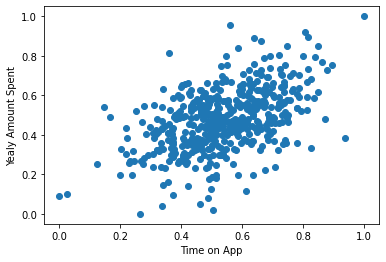

In [13]:
plt.scatter(y=Yearly_Amt_Spent, x=Time_on_App)
plt.xlabel('Time on App')
plt.ylabel('Yealy Amount Spent')
plt.show();


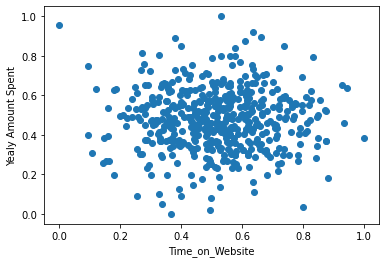

In [14]:
plt.scatter(y=Yearly_Amt_Spent, x=Time_on_Website)
plt.xlabel('Time_on_Website')
plt.ylabel('Yealy Amount Spent')
plt.show()


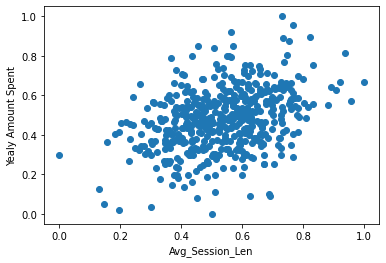

In [15]:
plt.scatter(y=Yearly_Amt_Spent, x=Avg_Session_Len)
plt.xlabel('Avg_Session_Len')
plt.ylabel('Yealy Amount Spent')
plt.show();


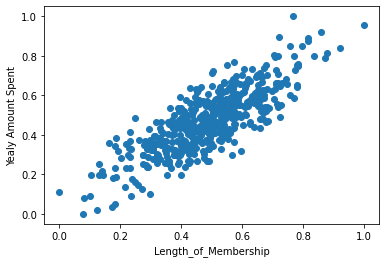

In [16]:
plt.scatter(y=Yearly_Amt_Spent, x=Length_of_Membership)
plt.xlabel('Length_of_Membership')
plt.ylabel('Yealy Amount Spent')
plt.show();


The relationship between the scaled data seems to match that of the unscaled data. 

# Linear Predictor Modelling 
### We will build our model with features that correlate with our target variable in the order from highest to lowest

###  Model 1 : One independent Variable
##### Linear Regression model with the independent variable that  have the strongest correlation with our target variable ('Yearly Amount Spent')

In [17]:
#Base LinReg Model

model1 = LinearRegression()


In [18]:
x = df[['Length of Membership']]
y = df['Yearly Amount Spent']


#Split data into train and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

#fit the data
model1.fit(x_train, y_train)


LinearRegression()

In [19]:
print(f'Slope : {model1.coef_}')
print(f'Intercept : {model1.intercept_}')

Slope : [63.46804921]
Intercept : 275.71964796092857


In [20]:
# Make Predictions on the testing set
y_predict = model1.predict(x_test)

In [21]:

print(f'RSquared Score for training dataset {model1.score(x_train, y_train)}')
print(f'RSquared Score for testing dataset {model1.score(x_test, y_test)}')

RSquared Score for training dataset 0.6612427140699977
RSquared Score for testing dataset 0.6400860081015991


**The model is giving an RSquared score of ~0.66 and ~0.64 on the training and testing data respectively. It is not overfitting on either and given a generalized score.**

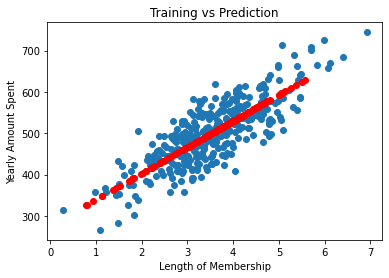

In [22]:
plt.scatter(x=x_train, y=y_train)
plt.scatter(x=x_test, y= model1.predict(x_test), color='red')
plt.title('Training vs Prediction')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

difference between the targets and the prediction

In [23]:
# DEfine Function for Calculating RMSE
def root_mean_squared_err(actual, predicted):
    return np.sqrt(((actual - predicted) ** 2).mean())

root_mean_squared_err(y_test, y_predict)

50.239171828884714

Our Model is given an RMSE score of ~50. We ideally want a lower RMSE. We will build another model by adding more features

### Model 2 : Two Independent Variables

In [24]:
model2 = LinearRegression()

In [25]:
x = df[['Length of Membership', 'Time on App']]
y = df['Yearly Amount Spent']


#Split data into train and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

#fit the data
model2.fit(x_train, y_train)


LinearRegression()

In [26]:
print(f'Slope : {model2.coef_}')
print(f'Intercept : {model2.intercept_}')

Slope : [62.45294131 37.07809804]
Intercept : -168.19613346092729


In [27]:
print(f'RSquared Score for training dataset {model2.score(x_train, y_train)}')
print(f'RSquared Score for testing dataset {model2.score(x_test, y_test)}')

RSquared Score for training dataset 0.8768236666618223
RSquared Score for testing dataset 0.8887802619378993


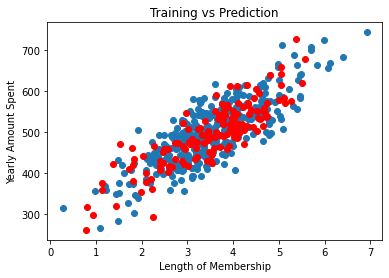

In [28]:
plt.scatter(x=x_train['Length of Membership'], y=y_train)
plt.scatter(x=x_test['Length of Membership'], y= model2.predict(x_test), color='red')
plt.title('Training vs Prediction')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [29]:
root_mean_squared_err(y_test, model2.predict(x_test))

27.927627316703575

This model is giving a rsquared value of ~0,877 and 0.889 on training and testing dataset respectively with an RMSE score of ~30. This model is given better results than the baseline model. 

### Model 3 : Three Independent Variables

In [30]:
model3 = LinearRegression()

In [31]:
x = df[['Length of Membership', 'Time on App', 'Avg. Session Length']]
y = df['Yearly Amount Spent']


#Split data into train and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

#fit the data
model3.fit(x_train, y_train)


LinearRegression()

In [32]:
print(f'Slope : {model3.coef_}')
print(f'Intercept : {model3.intercept_}')

Slope : [61.28526768 38.83699157 25.83045496]
Intercept : -1038.7195888310478


In [33]:
print(f'RSquared Score for training dataset {model3.score(x_train, y_train)}')
print(f'RSquared Score for testing dataset {model3.score(x_test, y_test)}')

RSquared Score for training dataset 0.9821294100004436
RSquared Score for testing dataset 0.9884050933006783


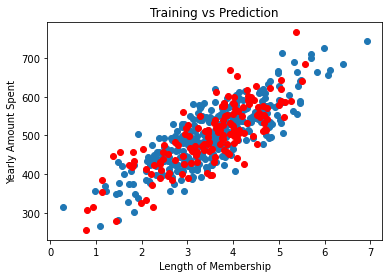

In [34]:
plt.scatter(x=x_train['Length of Membership'], y=y_train)
plt.scatter(x=x_test['Length of Membership'], y= model3.predict(x_test), color='red')
plt.title('Training vs Prediction')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [35]:
root_mean_squared_err(y_test, model3.predict(x_test))


9.017304504493627

This model is giving a better performance than the first two models. The RMSE value is the lowest amongst the three models

### Model 4: Four independent variables

In [36]:
model4 = LinearRegression()
x = df[['Length of Membership', 'Time on App', 'Avg. Session Length', 'Time on Website']]
y = df['Yearly Amount Spent']


#Split data into train and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

#fit the data
model4.fit(x_train, y_train)

LinearRegression()

In [37]:
print(f'Slope : {model4.coef_}')
print(f'Intercept : {model4.intercept_}')

Slope : [61.30479927 38.80900146 25.82792018  0.28174274]
Intercept : -1048.8204288622258


In [38]:
print(f'RSquared Score for training dataset {model4.score(x_train, y_train)}')
print(f'RSquared Score for testing dataset {model4.score(x_test, y_test)}')

RSquared Score for training dataset 0.9821435186303379
RSquared Score for testing dataset 0.9884637235175601


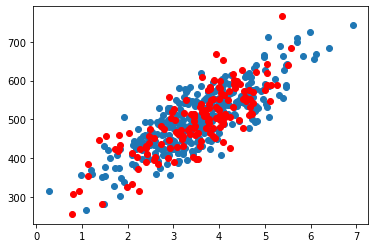

In [39]:
plt.scatter(x=x_train['Length of Membership'], y=y_train)
plt.scatter(x=x_test['Length of Membership'], y= model4.predict(x_test), color='red')
plt.show()

In [40]:
root_mean_squared_err(y_test, model4.predict(x_test))

8.99447738910761

Model4's performance has not imporved greatly over Model3. This is an indication that throwing more features into the model does not necessarily improve its performance.


### Model5 : Scaled data 

In [41]:
model5 = LinearRegression()

In [42]:
x = df[['Length of Membership', 'Time on App', 'Avg. Session Length']]
y = df[['Yearly Amount Spent']]
scaled_x = scaler.fit_transform(x)
scaled_y = scaler.fit_transform(y)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,scaled_y, test_size=0.30, random_state=1)

In [44]:
model5.fit(x_train, y_train)

LinearRegression()

In [45]:
print(f'Slope : {model5.coef_}')
print(f'Intercept : {model5.intercept_}')

Slope : [[0.80125697 0.50517242 0.33540053]]
Intercept : [-0.36471037]


In [46]:
print(f'RSquared Score for training dataset {model5.score(x_train, y_train)}')
print(f'RSquared Score for testing dataset {model5.score(x_test, y_test)}')

RSquared Score for training dataset 0.9821294100004436
RSquared Score for testing dataset 0.9884050933006783


In [47]:
root_mean_squared_err(y_test, model5.predict(x_test))

0.017721022069664572

The model with the scaled data (model5) gives a similar performance to that of model3. Scaling the data for this particular dataset did not improve the model performance



**We choose model3 as the best predictor**


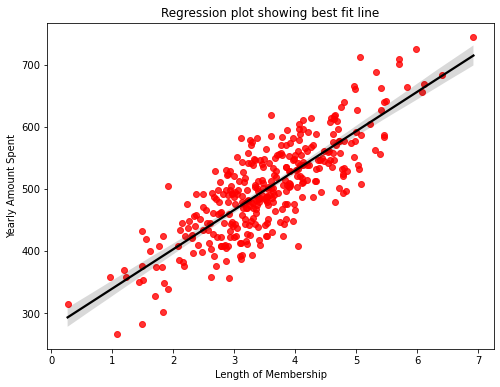

In [48]:
x = df[['Length of Membership', 'Time on App', 'Avg. Session Length']]
y = df['Yearly Amount Spent']


#Split data into train and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

#fit the data
model3.fit(x_train, y_train)

plt.figure(figsize=(8,6))
sns.regplot(x=x_train['Length of Membership'], y=y_train, scatter_kws={"color":'red'}, line_kws={"color":'black'})
plt.title('Regression plot showing best fit line')
plt.show()

# Conclusion
> We have tried to predict the features that greatly impact the yearly amount spent by a customer at an ecommerce store. We built five models to help answer the question `What features are best for predicting yearly amount spent? `
Though the lenght of membership has the highest correlation with amount spent yearly, we see that by adding more features, we are able to better increase the performance of our model. We also see that, after a while, adding more features does not improve the model performance significantly. 

